# Priors


## Quelques aspects techniques avant de commencer

Il est très important de faire tourner la section ci-dessous, même si d'un point de vue pratique elle ne fait que préparer les instruments dont nous allons nous servir plus tard dans le document.


In [16]:
# library utilisée pour faire le graphique
# install.packages("ggplot2") # installation, à faire une seule fois
# install.packages("HDInterval") 

library(ggplot2) # chargement
library(HDInterval)


En statistiques bayésiennes, une idée centrale est que l'on peut exprimer ce que l'on sait (ou ce que l'on croit savoir) sur un paramètre avant d'observer les données. Cette information préalable est appelée le prior, ou à priori.

Formellement on exprime nous connaissance à priori à travers une distribution de probabilité qui représente notre connaissance ou nos croyances sur les valeurs possibles du paramètre avant d'avoir vu les données.

Nous pouvons nous referer à notre exemple du traitement pour des troubles d'addiction aux substance dans lequel nous avons 10 personnes qui ont suivit le traitement et nous mésurons le nombre de personne qui ont au moins une rechute à 6 mois.

C'est que nous cherchons exprimer c'est les connaissances que nous avons sur le paramètre de probabilité de rechute $\theta$ avant de recolter les données.

## La loi Beta

La loi beta est utilisée pour definir des priors de paramètres qui varient entre 0 et 1, comme dans le cas de notre paramètre de rechute $\theta$. La distribution de la loi beta est définie comme il suit :

$$
f(\theta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} \, \theta^{\alpha - 1} (1 - \theta)^{\beta - 1}
$$

Et peux varier en fonctions de deux paramètres de forme:
* $\alpha$ : premier paramètre de forme
* $\beta$  : deuxième paramètre de forme

Ces deux paramètres de forme peuvent faire varier considerablement la forme de la curbe de cette distribution. Selon les valeurs de ces paramètres, la distribution peut prendre une grande variété de formes : uniforme, en cloche, en U ou fortement asymétrique.  Cette flexibilité et cette capacité à représenter une gamme variée de croyances rendent la distribution Beta très puissante.

Dans la cas présent, nous sommes en train de determiner la distribution des probabilité d'un paramètre $\theta$ que nous cherchons à estimer. Quand on determine les paramètres d'un distribution de probabilité d'un paramètre, comme dans la cas d'un prior, on parle de hyperparamètres sont les paramètres d’une distribution a priori. Autrement dit, lorsqu’on choisit une loi de probabilité (comme la Beta) pour exprimer nos croyances initiales sur un paramètre inconnu (comme $\theta$) avant d’avoir observé les données, cette loi contient elle-même des paramètres ($\alpha$,$\beta$), appelés hyperparamètres.

### Distribution uniforme

Si on definie $\beta = \alpha = 1$ on obtien une distribution uniforme ou toute les valeurs du paramètre $\theta$ qui represente notre hypothèse que l'on cherche à estimer. 

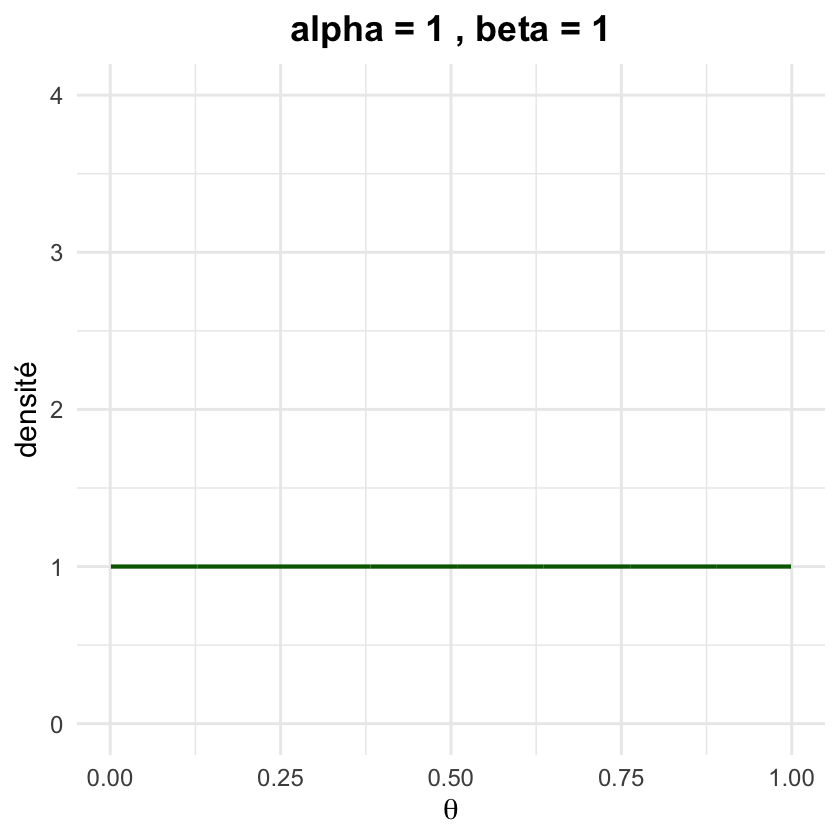

In [182]:
# Definir les hyper paramètres
alpha <- 1
beta  <- 1

# creation des donnes
x <- seq(0.001, 0.999, by = 0.001)
y <- dbeta(x, shape1 = alpha, shape2 = beta)

#  graphique
ggplot(data.frame(x, y), aes(x, y)) +
  geom_line(color = "darkgreen", linewidth = 1.2 ) + 
  ggtitle(paste("alpha =", alpha, ", beta =", beta)) +
  xlab( expression(theta)) +
  ylab("densité") +
  ylim(0,4) +
  theme_minimal(base_size = 18) +
  theme(plot.title = element_text(hjust = 0.5, face = "bold")) 



### Distribution linéaire croissante ou décroissante

Si on definie $\alpha = 1$ et $\beta =2$, nous avons une relation linaire qui détérmine que les valuers les plus bas sont les plus probables

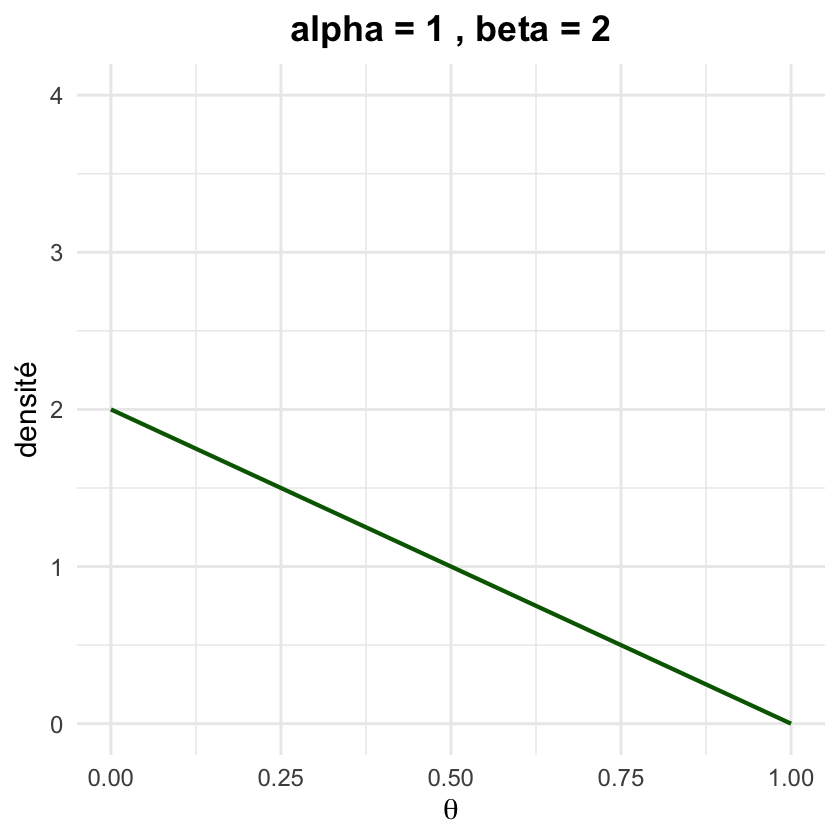

In [184]:
# Define shape parameters for the Beta distribution
alpha <- 1
beta  <- 2

# Create a data frame with values from 0 to 1 for plotting
x <- seq(0, 1, by = 0.01)
y <- dbeta(x, shape1 = alpha, shape2 = beta)

# Faire le graphique
ggplot(data.frame(x, y), aes(x, y)) +
  geom_line(color = "darkgreen", linewidth = 1.2 ) + 
  ggtitle(paste("alpha =", alpha, ", beta =", beta)) +
  xlab( expression(theta)) +
  ylab("densité") +
  ylim(0,4) +
  theme_minimal(base_size = 18) +
  theme(plot.title = element_text(hjust = 0.5, face = "bold")) 



Si on definie $\alpha = 2$ et $\beta =1$, nous avons une relation linaire qui détérmine que les valuers les plus haut sont les plus probables

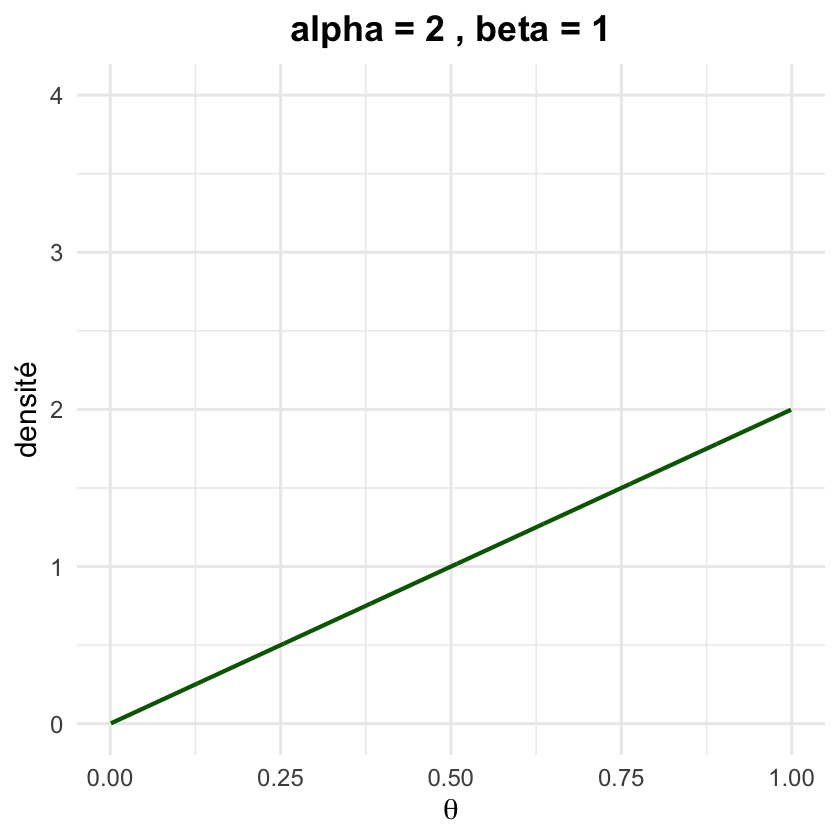

In [186]:
# Define shape parameters for the Beta distribution
alpha <- 2
beta  <- 1

# Create a data frame with values from 0 to 1 for plotting
x <- seq(0.001, 0.999, by = 0.001)
y <- dbeta(x, shape1 = alpha, shape2 = beta)

# Faire le graphique
ggplot(data.frame(x, y), aes(x, y)) +
  geom_line(color = "darkgreen", linewidth = 1.2 ) + 
  ggtitle(paste("alpha =", alpha, ", beta =", beta)) +
  xlab( expression(theta)) +
  ylab("densité") +
  ylim(0,4) +
  theme_minimal(base_size = 18) +
  theme(plot.title = element_text(hjust = 0.5, face = "bold")) 


### Distribution en cloche



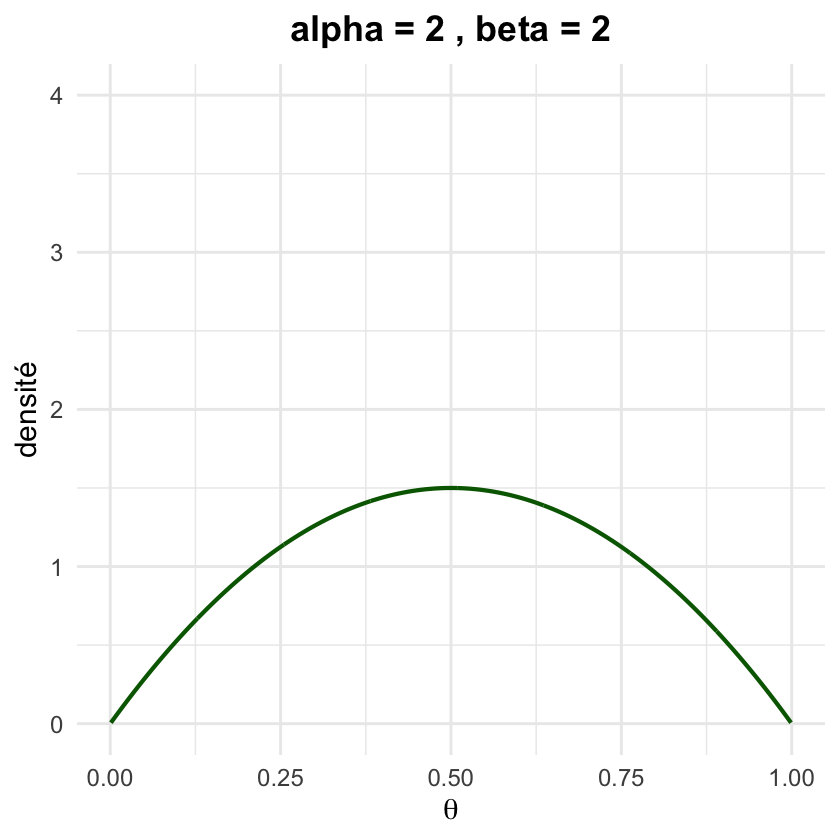

In [188]:
# Define shape parameters for the Beta distribution
alpha <- 2
beta  <- 2

# Create a data frame with values from 0 to 1 for plotting
x <- seq(0.001, 0.999, by = 0.001)
y <- dbeta(x, shape1 = alpha, shape2 = beta)

# Faire le graphique
ggplot(data.frame(x, y), aes(x, y)) +
  geom_line(color = "darkgreen", linewidth = 1.2 ) + 
  ggtitle(paste("alpha =", alpha, ", beta =", beta)) +
  xlab( expression(theta)) +
  ylab("densité") +
  ylim(0,4) +
  theme_minimal(base_size = 18) +
  theme(plot.title = element_text(hjust = 0.5, face = "bold")) 


Nnous pouvons changer la forme de la cloche en augementant la valuers des paramètres

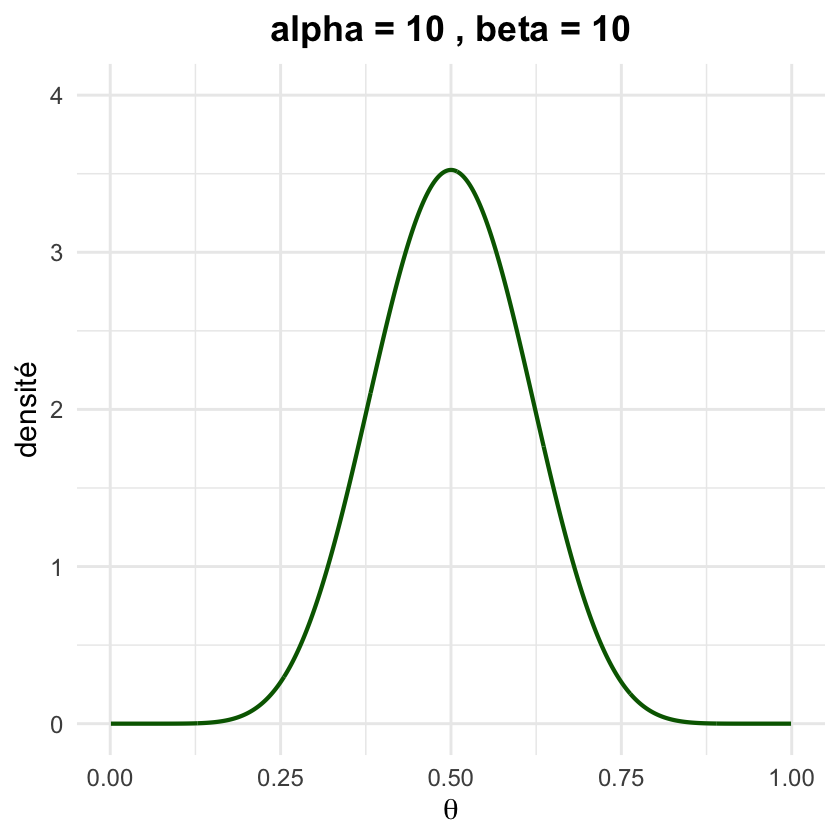

In [190]:
# Define shape parameters for the Beta distribution
alpha <- 10
beta  <- 10

# Create a data frame with values from 0 to 1 for plotting
x <- seq(0.001, 0.999, by = 0.001)
y <- dbeta(x, shape1 = alpha, shape2 = beta)

# Faire le graphique
ggplot(data.frame(x, y), aes(x, y)) +
  geom_line(color = "darkgreen", linewidth = 1.2 ) + 
  ggtitle(paste("alpha =", alpha, ", beta =", beta)) +
  xlab( expression(theta)) +
  ylab("densité") +
  ylim(0,4) +
  theme_minimal(base_size = 18) +
  theme(plot.title = element_text(hjust = 0.5, face = "bold")) 


### Distribution Asymetrique

En inserant des valeurs de beta et alpha différents il est aussi possible de creer des distribution 



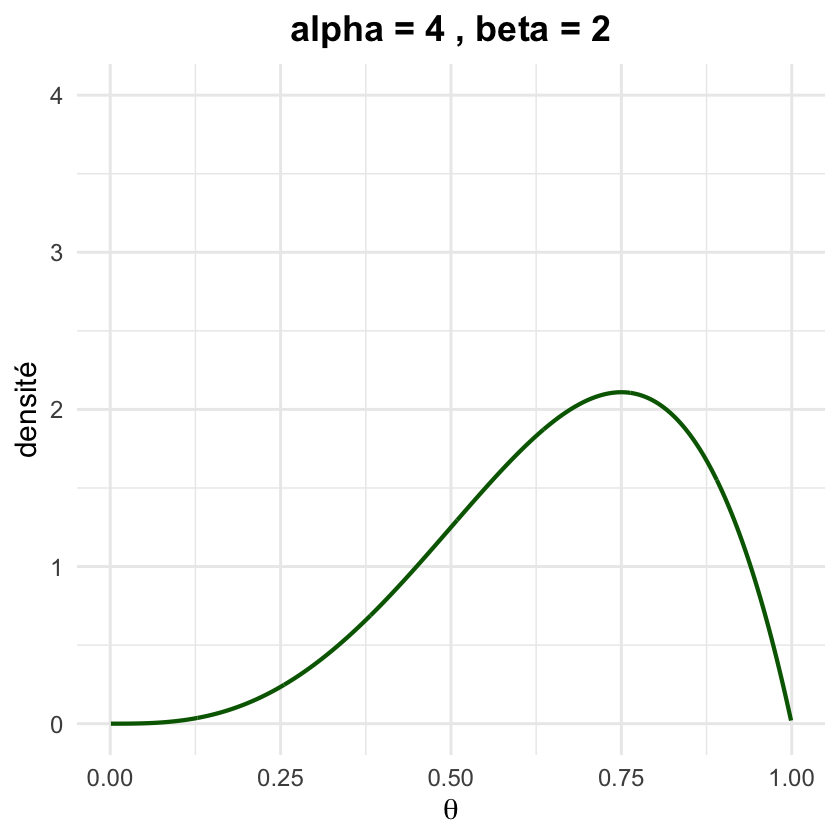

In [192]:
### Distribution en U# Define shape parameters for the Beta distribution
alpha <- 4
beta  <- 2
# Create a data frame with values from 0 to 1 for plotting
x <- seq(0.001, 0.999, by = 0.001)
y <- dbeta(x, shape1 = alpha, shape2 = beta)

# Faire le graphique
ggplot(data.frame(x, y), aes(x, y)) +
  geom_line(color = "darkgreen", linewidth = 1.2 ) + 
  ggtitle(paste("alpha =", alpha, ", beta =", beta)) +
  xlab( expression(theta)) +
  ylab("densité") +
  ylim(0,4) +
  theme_minimal(base_size = 18)+
  theme(plot.title = element_text(hjust = 0.5, face = "bold")) 


### Distribution en U

Nous pouvons même obtenir une distribution en U qui determine que les paramètres aux extremes sont les plus probables en inserant des paramètres de formes avec les même valeurs plus petites que 1.

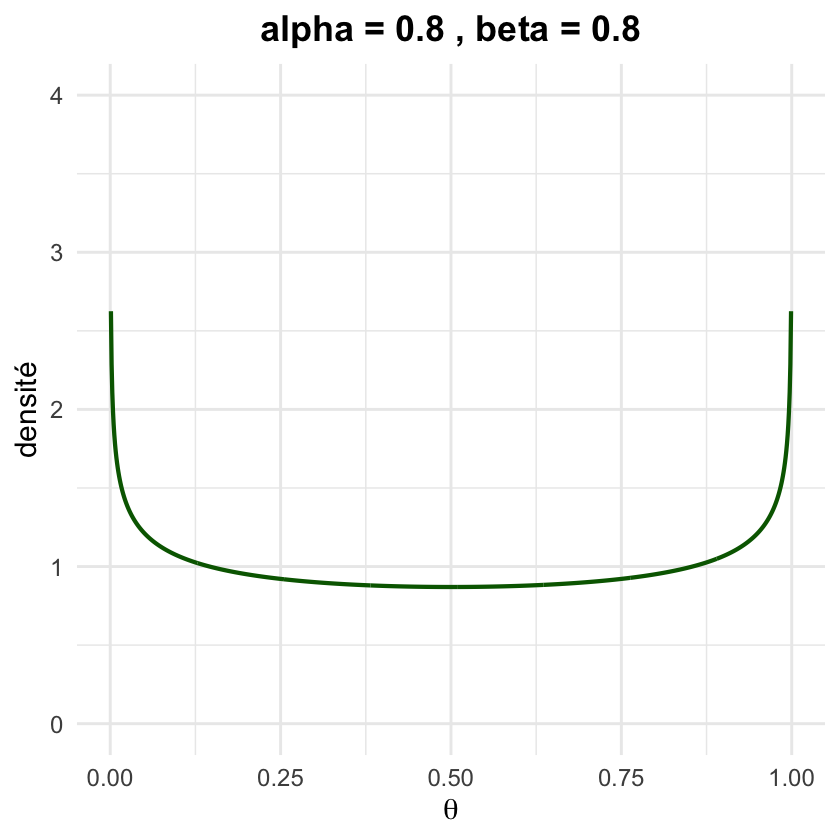

In [180]:
### Distribution en U# Define shape parameters for the Beta distribution
alpha <- 0.8
beta  <- 0.8
# Create a data frame with values from 0 to 1 for plotting
x <- seq(0.001, 0.999, by = 0.001)
y <- dbeta(x, shape1 = alpha, shape2 = beta)

# Faire le graphique
ggplot(data.frame(x, y), aes(x, y)) +
  geom_line(color = "darkgreen", linewidth = 1.2 ) + 
  ggtitle(paste("alpha =", alpha, ", beta =", beta)) +
  xlab( expression(theta)) +
  ylab("densité") +
  ylim(0,4) +
  theme_minimal(base_size = 18) +
  theme(plot.title = element_text(hjust = 0.5, face = "bold")) 


## Incorporer les informations à prior dans l'estimation des paramèters

Dans le cas de notre exemple nous pouvons facilement conjuguer la vraisembalnce avec le prior parce que nous avons un modèle très simple. Nous pouvons formaliser notre modèle comme il suit:

- $x \sim \mathrm{Binomial}(n, \theta) \quad \text{[vraisemblance]}$

- $\theta \sim \mathrm{Beta}(2, 2) \quad \text{[prior pour } \theta \text{]}$


Pour ce qui concerne les données observées nous avons:


- $n = 10 \quad \text{[taille de l'échantillon]}$

- $k = 3 \quad \text{[rechute à 6 mois]}$


Comme dans la loi beta on connait la formule exacte de la constante de normalisation nous pouvons l'ignorer pour le début:

$$ P(\theta \mid x) \propto P(x \mid \theta) \cdot P(\theta) $$


Ensuite nous allons simplement rentrer le modèle de la binomiale dans la vraisemblance ($P(x \mid \theta)$) et le modèle de la beta dans le prior ($P(\theta)$) comme il suit:

$$ P(\theta \mid x) \propto \binom{n}{k} \theta^k (1 - \theta)^{n - k} \cdot \theta^{\alpha - 1} (1 - \theta)^{\beta - 1}$$

Si on rearrages les termes on obtien:

$$ P(\theta \mid x) \propto  \theta^{(\alpha + k)  - 1} (1 - \theta)^{(\beta+n-k) - 1}$$

et si on rajoute la constante de normalisation on obtien simplement la distribution à posteriori du paramètres $\theta$ comme il suit:

$$ \theta \sim \text{Beta}(\alpha + k, \beta + n - k) $$








On utilisant cette simple formule nous pouvons l'appliquer à nos données et notre prior pour obtenir la distruntion  à posteriori comme il suit:

$$ \theta \sim \text{Beta}(2 + 3, 2 + 10 - 3) $$

$$ \theta \sim \text{Beta}(5, 9) $$

Et nous pouvons l'implémenter dans le code comme illustré ci-dessous:

In [187]:
# Define Beta parameters

alpha <- 5
beta  <- 9

# Create a grid of values between 0 and 1
x <- seq(0.0001, 0.9999, by = 0.0001)
y <- dbeta(x, alpha, beta)


Une fois que nous avons la distribution nous pouvons calculer la valeur mediane

In [189]:
samples <- rbeta(10000, alpha, beta)
median_simulated <- median(samples)
print(median_simulated)


[1] 0.4972911


e aussi le 95% HDI

In [185]:
# Calculate 95% HDI using samples
samples <- rbeta(10000, alpha, beta)
hdi_bounds <- hdi(samples, credMass = 0.95)
print(hdi_bounds)

    lower     upper 
0.1329316 0.6001054 
attr(,"credMass")
[1] 0.95


Nous pouvons aussi representer visuellement les résultats

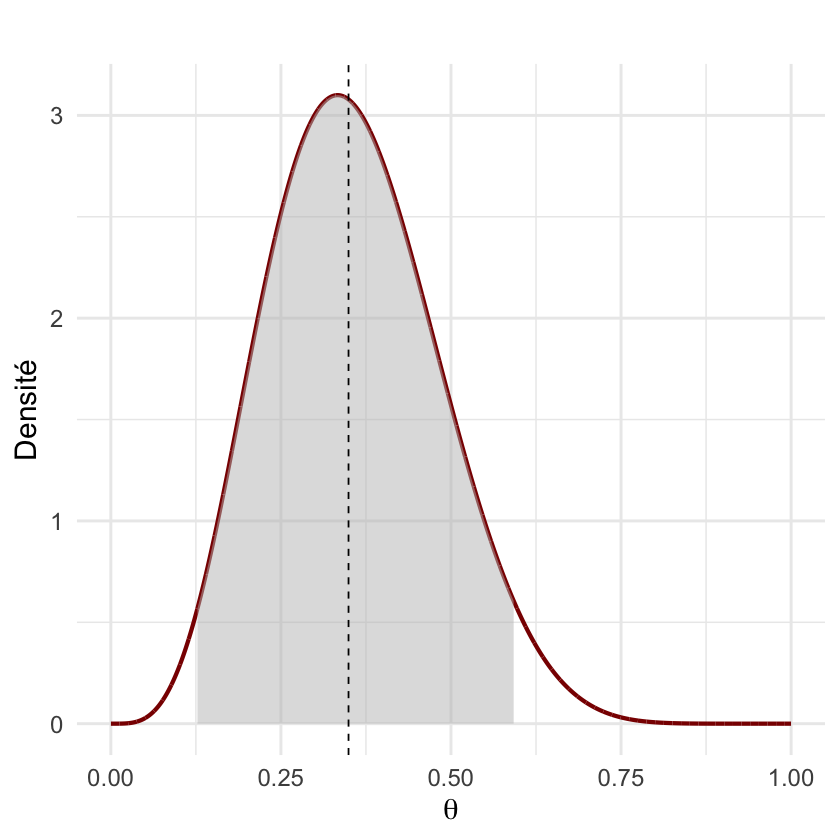

In [181]:
# Data for plotting
df <- data.frame(x = x, y = y)

# Create the plot
ggplot(df, aes(x = x, y = y)) +
  geom_line(color = "darkred", linewidth = 1.2) +
  geom_area(data = subset(df, x >= hdi_bounds[1] & x <= hdi_bounds[2]),
            aes(x = x, y = y), fill = "gray", alpha = 0.5) +
  geom_vline(xintercept = median_simulated, linetype = "dashed", color = "black") +
  labs(title = "",
       x = expression(theta),
       y = "Densité") +
  theme_minimal(base_size = 18)


## Tester l'impact des priors et des données sur l'estimation de la distribution a posteriori

Nous pouvons essayer de tester l'impact des priors et des données sur l'estimation de la distribution à posteriori.

Dans notre exemple, nous avions 10 personnes qui ont suivi le traitement et nous avons mesuré le taux de rechute à 6 mois, constatant que 3 personnes sur 10 avaient eu une rechute. Dans le cours sur la vraisemblance, nous avions utilisé différentes méthodes pour estimer la valeur du taux de rechute ($\theta$) du traitement qui s’ajuste le mieux aux données que l'on observe. Nous avons vu que la valeur du paramètre $\theta$ qui maximise la vraisemblance des données était de $0.3$.

En utilisant cet exemple, nous pouvons tester quel est l’impact des différents priors sur l’estimation de la distribution a posteriori de $\theta$.


Nous pouvons aussi tester quel est l’impact des données : nous pouvons par exemple tester quelle est la différence entre un échantillon de 100 personnes avec 30 rechutes ou 1000 personnes et 300 rechutes, et voir quel est l’impact des priors selon la quantité de données.

Pour ce faire, nous pouvons modifier dans le code ci-dessous les paramètres de la distribution a priori (`alpha_pr` et `beta_pr`) ainsi que la taille de l’échantillon (`n`) et le nombre de rechutes (`k`).


In [242]:
# hyper paramètres de la distribution a priori
alpha_pr = 2
beta_pr  = 2

# data
k = 3
n = 10

# hyper paramètres de la distribution a posteriori
alpha <- alpha_pr + k
beta  <- beta_pr + n - k

print(alpha)
print(beta)

# Create a grid of values between 0 and 1
x <- seq(0.0001, 0.9999, by = 0.0001)
y <- dbeta(x, alpha, beta)


[1] 5
[1] 9


In [260]:
samples <- rbeta(1000, alpha, beta)
median_simulated <- median(samples)
print(median_simulated)

[1] 0.3565062


In [254]:
samples <- rbeta(1000, alpha, beta)
hdi_bounds <- hdi(samples, credMass = 0.95)
print(hdi_bounds)

    lower     upper 
0.1499204 0.6181510 
attr(,"credMass")
[1] 0.95


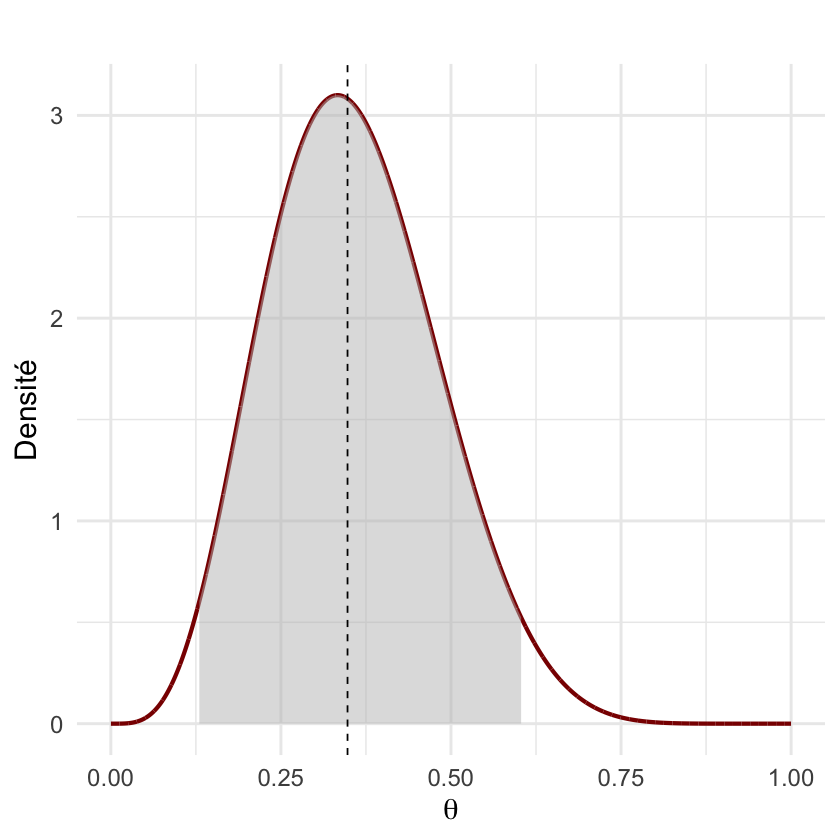

In [234]:
# Data for plotting
df <- data.frame(x = x, y = y)

# Create the plot
ggplot(df, aes(x = x, y = y)) +
  geom_line(color = "darkred", linewidth = 1.2) +
  geom_area(data = subset(df, x >= hdi_bounds[1] & x <= hdi_bounds[2]),
            aes(x = x, y = y), fill = "gray", alpha = 0.5) +
  geom_vline(xintercept = median_simulated, linetype = "dashed", color = "black") +
  labs(title = "",
       x = expression(theta),
       y = "Densité") +
  theme_minimal(base_size = 18)

Ce que nous pouvons observer à travers les essais ci-dessus c'est que:

* Des bonnes informations à priori peuvent reduire le degree d'uncertitude de l'estimation à posteriori.
  
* Les estimations bayésiennes et fréquentistes s’accordent toujours s’il y a suffisamment de données (tant que la vraisemblance n’est pas explicitement exclue par la loi a priori)